**Attributes:**

1.	age - Age of the patient
2.	sex - Gender of the patient (1 = male, 0 = female)
3.	cp - Chest pain type (values range from 1 to 4)
4.	trestbps - Resting blood pressure (in mm Hg)
5.	chol - Serum cholesterol in mg/dl
6.	fbs - Fasting blood sugar > 120 mg/dl (1 = true, 0 = false)
7.	restecg - Resting electrocardiographic results (values 0, 1, 2)
8.	thalach - Maximum heart rate achieved
9.	exang - Exercise induced angina (1 = yes, 0 = no)
10.	oldpeak - ST depression induced by exercise relative to rest
11.	slope - The slope of the peak exercise ST segment
12.	ca - Number of major vessels (0-3) colored by fluoroscopy
13.	thal - Thalassemia (3 = normal, 6 = fixed defect, 7 = reversible defect)
14.	class - Diagnosis of heart disease (value 0 = absence, 1-4 = presence


In [ ]:
import sys
import pandas as pd
import numpy as np
import sklearn
import matplotlib
import keras

**Function to plot the confisuion Matrix**

In [ ]:
def plot_confusion_matrix(y,y_predict):
    "this function plots the confusion matrix"
    from sklearn.metrics import confusion_matrix

    cm = confusion_matrix(y, y_predict)
    ax= plt.subplot()
    sns.heatmap(cm, annot=True, ax = ax); #annot=True to annotate cells
    ax.set_xlabel('Predicted labels')
    ax.set_ylabel('True labels')
    ax.set_title('Confusion Matrix');
    ax.xaxis.set_ticklabels(['no heart disease', 'heart disease']); ax.yaxis.set_ticklabels(['no heart disease', 'heart disease'])
    plt.show()

In [ ]:
df = pd.read_csv('/content/data_heart.csv')

In [ ]:
df.shape

(303, 14)

The dataset contains 303 entries and 14 attributes related to heart disease prediction

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    object 
 12  thal      303 non-null    object 
 13  class     303 non-null    int64  
dtypes: float64(1), int64(11), object(2)
memory usage: 33.3+ KB


**Data Understanding and Exploratory Data Analysis:**

**Visualizations:**
1.	Histograms for continuous variables (age, trestbps, chol, thalach, oldpeak).
2.	Bar plots for categorical variables (sex, cp, fbs, restecg, exang, slope, ca, thal).
3.	Pie chart for the class distribution.


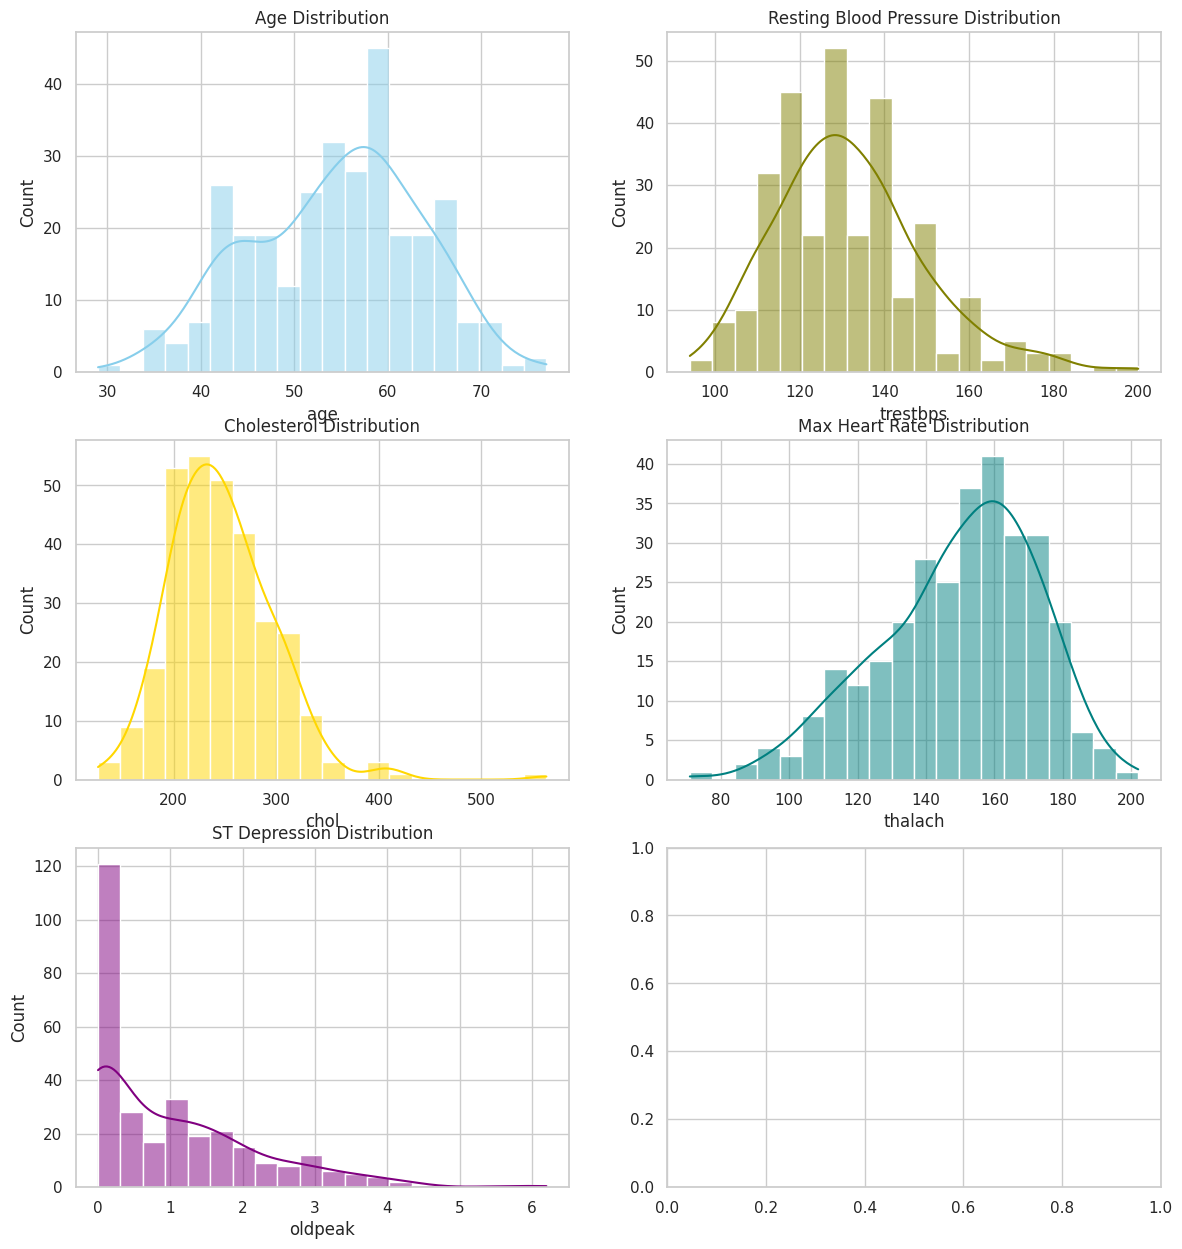

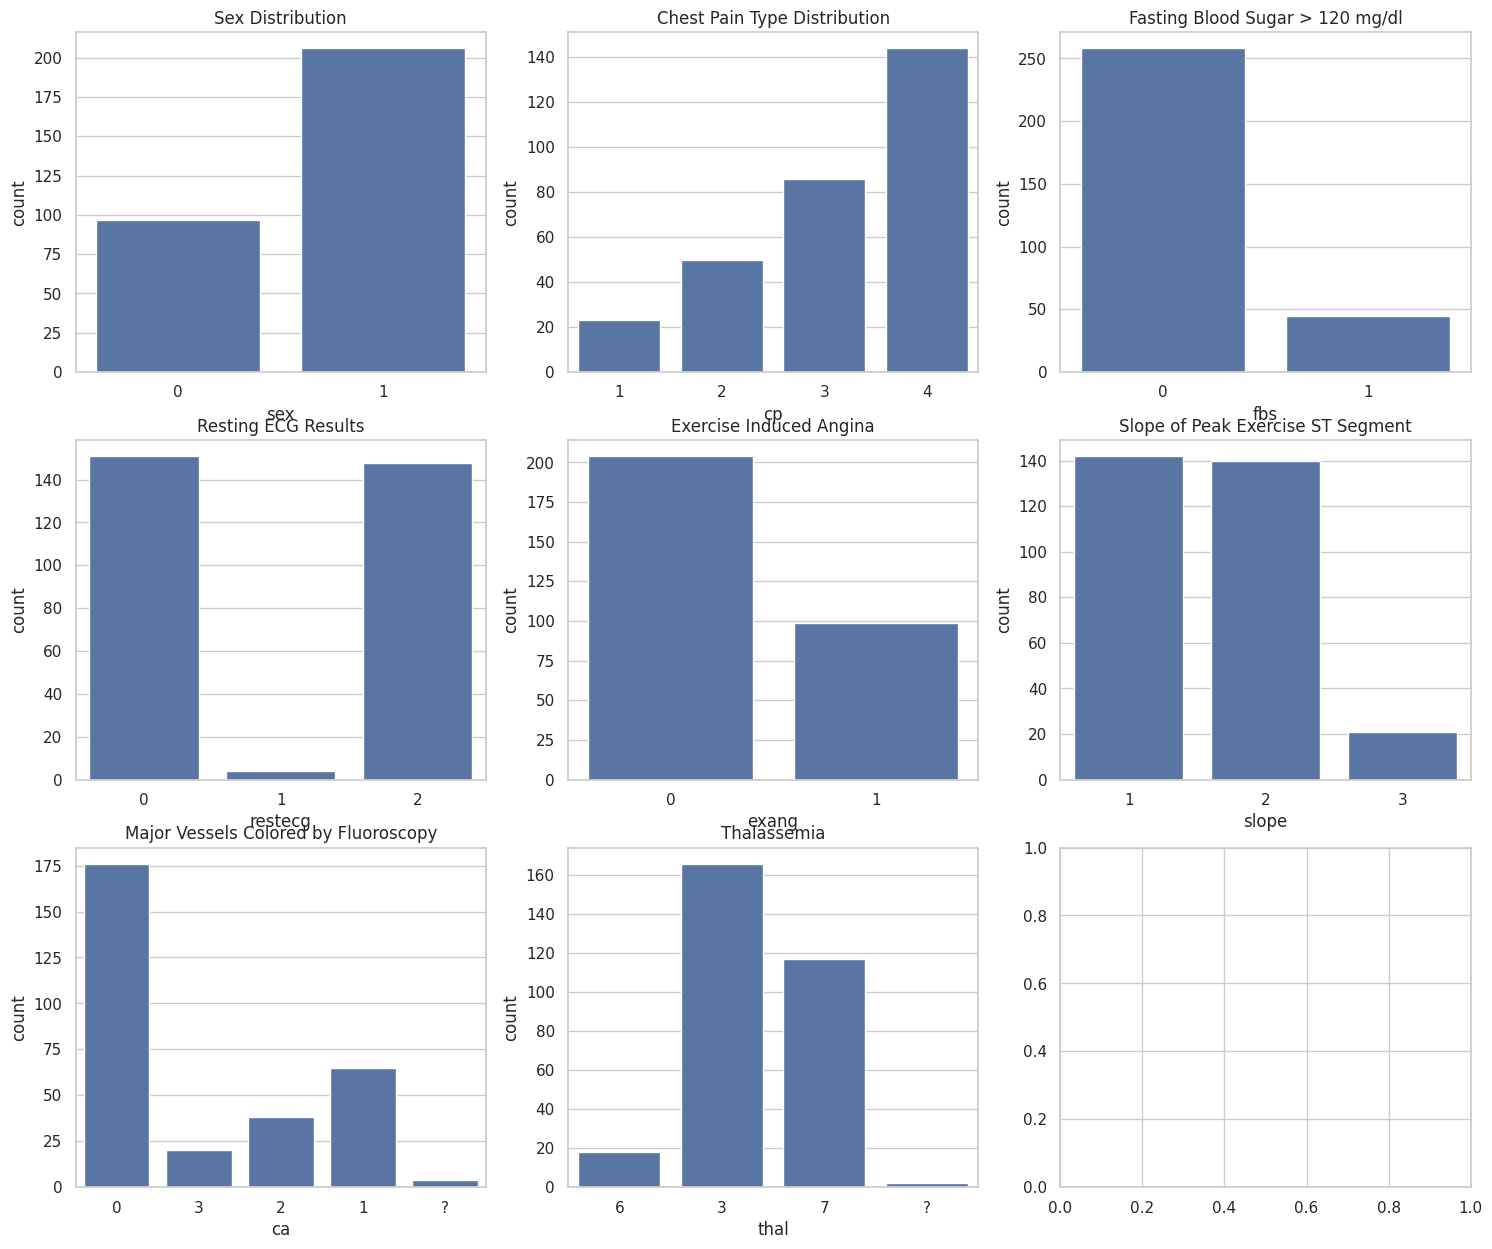

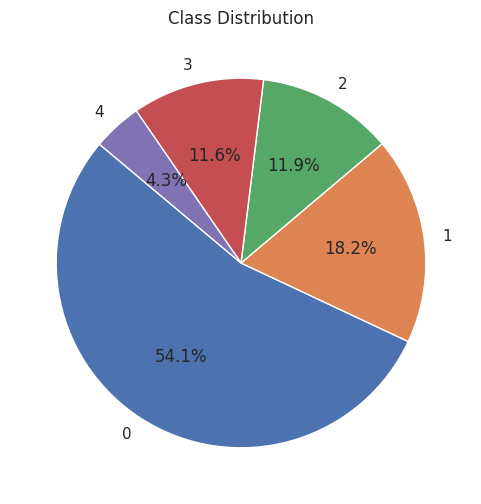

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Setting up the aesthetic for the plots
sns.set(style="whitegrid")

# Plotting histograms for continuous variables
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(14, 15))
sns.histplot(df['age'], bins=20, kde=True, ax=axes[0, 0], color="skyblue").set(title='Age Distribution')
sns.histplot(df['trestbps'], bins=20, kde=True, ax=axes[0, 1], color="olive").set(title='Resting Blood Pressure Distribution')
sns.histplot(df['chol'], bins=20, kde=True, ax=axes[1, 0], color="gold").set(title='Cholesterol Distribution')
sns.histplot(df['thalach'], bins=20, kde=True, ax=axes[1, 1], color="teal").set(title='Max Heart Rate Distribution')
sns.histplot(df['oldpeak'], bins=20, kde=True, ax=axes[2, 0], color="purple").set(title='ST Depression Distribution')

# Plotting bar plots for categorical variables
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(18, 15))
sns.countplot(x='sex', data=df, ax=axes[0, 0]).set(title='Sex Distribution')
sns.countplot(x='cp', data=df, ax=axes[0, 1]).set(title='Chest Pain Type Distribution')
sns.countplot(x='fbs', data=df, ax=axes[0, 2]).set(title='Fasting Blood Sugar > 120 mg/dl')
sns.countplot(x='restecg', data=df, ax=axes[1, 0]).set(title='Resting ECG Results')
sns.countplot(x='exang', data=df, ax=axes[1, 1]).set(title='Exercise Induced Angina')
sns.countplot(x='slope', data=df, ax=axes[1, 2]).set(title='Slope of Peak Exercise ST Segment')
sns.countplot(x='ca', data=df, ax=axes[2, 0]).set(title='Major Vessels Colored by Fluoroscopy')
sns.countplot(x='thal', data=df, ax=axes[2, 1]).set(title='Thalassemia')

# Plotting class distribution
plt.figure(figsize=(6, 6))
plt.pie(df['class'].value_counts(), labels=df['class'].value_counts().index, autopct='%1.1f%%', startangle=140)
plt.title('Class Distribution')
plt.show()



Exploratory Data Analysis Visualizations:
Histograms for Continuous Variables:
Age: Most patients are between 50 and 60 years old.
Resting Blood Pressure: Majority of patients have resting blood pressure around 120 to 140 mm Hg.
Cholesterol: Cholesterol levels show a broad distribution, mostly ranging between 200 and 300 mg/dl.
Max Heart Rate: Generally distributed around 140 to 160 bpm.
ST Depression: Most values are low, indicating minimal ST depression.
Bar Plots for Categorical Variables:
Sex: There are more males than females in the dataset.
Chest Pain Type: Type 3 (asymptomatic) is the most common.
Fasting Blood Sugar: Most patients do not have fasting blood sugar > 120 mg/dl.
Resting ECG: Shows a relatively even distribution across the three categories.
Exercise Induced Angina: Most patients do not experience angina during exercise.
Slope of Peak Exercise ST Segment: Type 2 is the most common.
Major Vessels Colored by Fluoroscopy: Most patients have 0 detectable vessels.
Thalassemia: '3' (normal) and '7' (reversible defect) are common values.
Class Distribution Pie Chart:
The pie chart shows a relatively balanced distribution of classes, indicating a variety of heart disease stages in the dataset.


**Data Preprocessing & Feature Engineering**
Here's the summary from our initial preprocessing check:

There are no missing values reported directly, but both 'ca' and 'thal' fields contain '?' as placeholders, which we need to handle as missing values.
The 'ca' feature, which represents the number of major vessels seen in fluoroscopy, should typically range from 0 to 3, but includes '?'.
Similarly, 'thal' has expected categories (3, 6, 7) and '?', indicating missing or erroneous entries.
Handling Missing Data
We will replace '?' with NaN and then decide how to handle these NaN values—options include replacing them with the mode (most frequent value) or removing those records, depending on their quantity.

**Data Cleaning**

In [ ]:
#Identify and replace '?' in the dataset
for column in df.columns:
    if df[column].dtype == object:
        # Check if '?' exists in this column
        if (df[column] == '?').any():
            print(f"'?' found in {column}. Replacing with NaN and then with the mode of the column.")
            df[column] = df[column].replace('?', pd.NA)
            mode_value = df[column].mode()[0]
            df[column].fillna(mode_value, inplace=True)

# Optionally, check again for any remaining '?' if needed
if (df == '?').any().any():
    print("There are still some '?' entries.")
else:
    print("All '?' entries have been replaced.")



'?' found in ca. Replacing with NaN and then with the mode of the column.
'?' found in thal. Replacing with NaN and then with the mode of the column.
All '?' entries have been replaced.


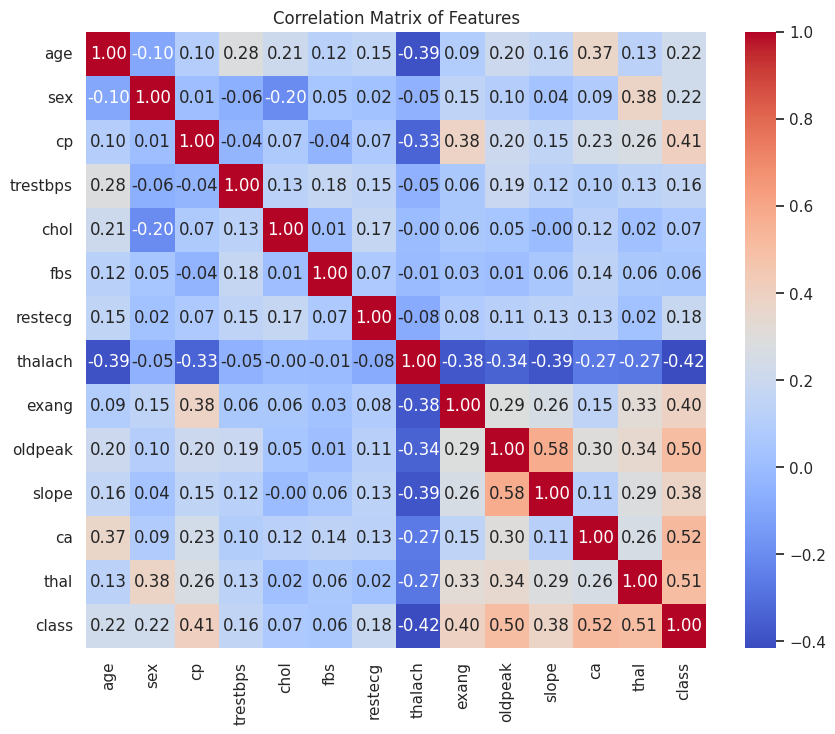

In [ ]:
corr_matrix = df.corr()
fig, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", ax=ax)
ax.set_title('Correlation Matrix of Features')
plt.show()
plt.show()

In [ ]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,class
0,63,1,1,145,233,1,2,150,0,2.3,3,0,6,0
1,67,1,4,160,286,0,2,108,1,1.5,2,3,3,2
2,67,1,4,120,229,0,2,129,1,2.6,2,2,7,1
3,37,1,3,130,250,0,0,187,0,3.5,3,0,3,0
4,41,0,2,130,204,0,2,172,0,1.4,1,0,3,0


**Correlation Matrix The correlation matrix reveals how each variable relates to the others:**

Thalach shows a moderate negative correlation with age, which is expected as heart rate max tends to decrease with age. Oldpeak has a slight positive correlation with age and trestbps, which could be explored further for insights related to cardiovascular stress.

#Data Preprocessing and Feature Engineering#

In [ ]:
# transform data to numeric to enable further analysis
df = df.apply(pd.to_numeric)
df.dtypes

age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
class         int64
dtype: object

In [ ]:
# Assuming the last column is the target with class labels 0 to 4
X = np.array(df.drop(['class'],axis =  1))
y = np.array(df['class'])

In [ ]:
# Normalize the dataset.

from sklearn.preprocessing import StandardScaler
Scaler = StandardScaler()
x = Scaler.fit_transform(X)


In [ ]:
x


array([[ 0.94872647,  0.68620244, -2.25177456, ...,  2.27457861,
        -0.71113139,  0.66000414],
       [ 1.39200191,  0.68620244,  0.87798549, ...,  0.64911323,
         2.5048807 , -0.89023814],
       [ 1.39200191,  0.68620244,  0.87798549, ...,  0.64911323,
         1.43287667,  1.17675157],
       ...,
       [ 0.28381332,  0.68620244,  0.87798549, ...,  0.64911323,
         0.36087264,  1.17675157],
       [ 0.28381332, -1.4572959 , -1.20852121, ...,  0.64911323,
         0.36087264, -0.89023814],
       [-1.82174501,  0.68620244, -0.16526786, ..., -0.97635214,
        -0.71113139, -0.89023814]])

In [ ]:
# Split the dataset into training and testing sets
from sklearn import model_selection
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size = 0.2)

In [ ]:
# convert the data to categorical labels
from tensorflow.keras.utils import to_categorical
Y_train = to_categorical(y_train, num_classes=None)
Y_test = to_categorical(y_test, num_classes=None)
print (Y_train.shape)
print (Y_train[:10])

(242, 5)
[[0. 1. 0. 0. 0.]
 [0. 0. 0. 1. 0.]
 [0. 1. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0.]
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0.]
 [0. 0. 0. 1. 0.]
 [1. 0. 0. 0. 0.]]


#Model Building and Training#

In [ ]:
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, ConfusionMatrixDisplay
from tensorflow.keras.models import Sequential
from keras.layers import GaussianNoise
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from keras import regularizers
import matplotlib.pyplot as plt
from keras.optimizers import Adam
from keras.layers import Dropout
import numpy
seed = 1
numpy.random.seed(seed)

In [ ]:
# defining a function for the ANN model
def build_model():
    # create model
    model = Sequential()
    model.add(Dense(16, input_dim=13,kernel_initializer='normal',activation='relu'))
    model.add(Dropout(0.2))
    model.add(Dense(8,kernel_initializer='normal', activation='relu'))
    model.add(Dropout(0.2))
    model.add(Dense(5, activation='softmax'))

    # compile model
    adam = Adam(learning_rate=0.001)
    model.compile(loss='categorical_crossentropy', optimizer=adam, metrics=['accuracy'])
    return model


In [ ]:
model = build_model()
print(model.summary())

Model: "sequential_38"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_148 (Dense)                    │ (None, 16)                  │             224 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_6 (Dropout)                  │ (None, 16)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_149 (Dense)                    │ (None, 8)                   │             136 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_7 (Dropout)                  │ (None, 8)                   │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_150 (Dense)                    │ (None, 5)                   │              45 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 405 (1.58 KB)

 Trainable params: 405 (1.58 KB)

 Non-trainable params: 0 (0.00 B)

None


In [ ]:
# fit the model to the training data
history = model.fit(X_train, Y_train, validation_data=(X_test, Y_test),epochs = 150, batch_size=10)

Epoch 1/150
25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - accuracy: 0.3539 - loss: 1.6572 - val_accuracy: 0.5574 - val_loss: 1.4426
Epoch 2/150
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5367 - loss: 1.3954 - val_accuracy: 0.5574 - val_loss: 1.3042
Epoch 3/150
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4607 - loss: 1.4475 - val_accuracy: 0.5574 - val_loss: 1.2827
Epoch 4/150
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5553 - loss: 1.3913 - val_accuracy: 0.5574 - val_loss: 1.3056
Epoch 5/150
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5323 - loss: 1.3521 - val_accuracy: 0.5574 - val_loss: 1.2569
Epoch 6/150
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5158 - loss: 1.3566 - val_accuracy: 0.5574 - val_loss: 1.2372
Epoch 7/150
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5572 - loss: 1.3444 - val_accuracy: 0.5574 - val_loss: 1.2754
Epoch 8/150
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5375 - loss: 1.3337 - val_accuracy: 0.5574 - 

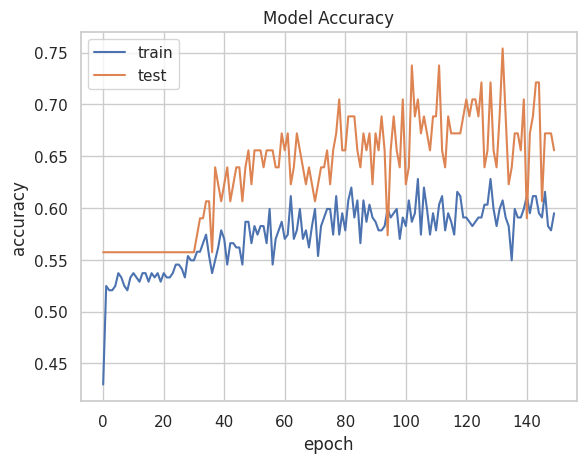

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
# Model accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'])
plt.show()

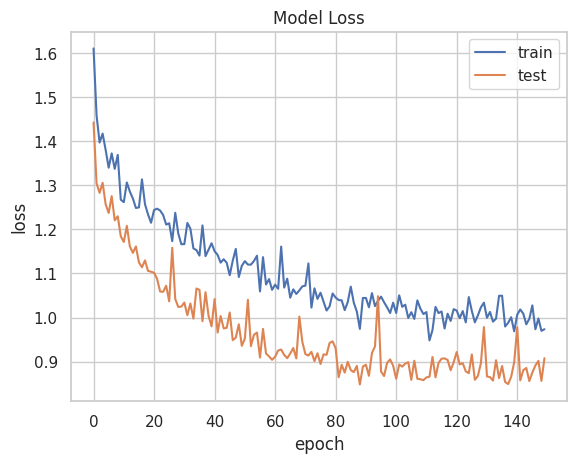

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'])
plt.show()

#Setup a Binary Classification Problem#

In [ ]:
# convert into binary classification problem - heart disease or no heart disease
Y_train_binary = y_train.copy()
Y_test_binary = y_test.copy()

Y_train_binary[Y_train_binary > 0] = 1
Y_test_binary[Y_test_binary > 0] = 1
#print the first 10 classes
print(Y_train_binary[:10])

[1 1 1 0 1 0 0 1 1 0]


**Perform GridSearchCV() on the model using the hyperparameters grid:**

In [ ]:
!pip install scikeras

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 1.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.1/12.1 MB 2.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 311.2/311.2 kB 2.7 MB/s eta 0:00:00
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.2.2
    Uninstalling scikit-learn-1.2.2:
      Successfully uninstalled scikit-learn-1.2.2
  Attempting uninstall: keras
    Found existing installation: keras 2.15.0
    Uninstalling keras-2.15.0:
      Successfully uninstalled keras-2.15.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow 2.15.0 requires keras<2.16,>=2.15.0, but you have keras 3.3.2 which is incompatible.


In [ ]:
# settting earystopping
from keras.callbacks import EarlyStopping
es_callback = EarlyStopping(monitor='val_loss', mode='min')
es_callback = EarlyStopping(monitor='val_loss', mode='min', patience=20)

In [ ]:
# define a new keras model for binary classification
def build_binary_model(lambda_parameter):
    # create model
    model = Sequential()
    model.add(Dense(16,input_dim=13, kernel_initializer='normal',activation='relu',kernel_regularizer=regularizers.l2(lambda_parameter)))
    model.add(Dense(8, kernel_initializer='normal', activation='relu',kernel_regularizer=regularizers.l2(lambda_parameter)))
    model.add(Dense(4, kernel_initializer='normal', activation='relu',kernel_regularizer=regularizers.l2(lambda_parameter)))
    model.add(Dense(1, activation='sigmoid'))

    # Compile model
    adam = Adam(learning_rate=0.001)
    model.compile(loss='binary_crossentropy', optimizer=adam, metrics=['accuracy'])
    return model
binary_model = build_binary_model(0.001)
print(binary_model.summary())

Model: "sequential_123"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_486 (Dense)                    │ (None, 16)                  │             224 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_487 (Dense)                    │ (None, 8)                   │             136 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_488 (Dense)                    │ (None, 4)                   │              36 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_489 (Dense)                    │ (None, 1)                   │               5 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 401 (1.57 KB)

 Trainable params: 401 (1.57 KB)

 Non-trainable params: 0 (0.00 B)

None


In [ ]:
from scikeras.wrappers import KerasClassifier
from sklearn.model_selection import GridSearchCV
# define a seed for random number generator so the result will be reproducible
import numpy
seed = 1
numpy.random.seed(seed)
# define all the possible values for each hyperparameter
lambda_parameter = [0.01, 0.5, 1]
epochs = [50,100,150]
batch_size = [10]
# create the Keras wrapper with scikit learn
model = KerasClassifier(lambda_parameter =[0.01, 0.5, 1],build_fn= build_binary_model, verbose=0)

In [ ]:
# create the dictionary containing all possible values of hyperparameters
param_grid = dict(lambda_parameter=lambda_parameter, epochs = epochs, batch_size = batch_size)
# perform 5-fold cross validation for to store the results
ANN_CV = GridSearchCV(estimator=model, param_grid=param_grid, cv=5)
results = ANN_CV .fit(X_train,Y_train_binary)

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using 

In [ ]:
#Print the results for the best cross-validation score:
print('Best cross validation score =', results.best_score_)
print('Parameters for Best cross validation score=', results.best_params_)

Best cross validation score = 0.7436224489795918
Parameters for Best cross validation score= {'batch_size': 10, 'epochs': 150, 'lambda_parameter': 0.01}


In [ ]:
# fit the binary model on the training data
history = binary_model.fit(X_train, Y_train_binary, validation_data=(X_test, Y_test_binary),epochs = 150, batch_size=10,callbacks=[es_callback])

Epoch 1/150
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6298 - loss: 0.6204 - val_accuracy: 0.7541 - val_loss: 0.5326
Epoch 2/150
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7294 - loss: 0.5485 - val_accuracy: 0.6393 - val_loss: 0.5947
Epoch 3/150
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7314 - loss: 0.6142 - val_accuracy: 0.7705 - val_loss: 0.5231
Epoch 4/150
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7799 - loss: 0.4943 - val_accuracy: 0.6230 - val_loss: 0.6282
Epoch 5/150
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6891 - loss: 0.5956 - val_accuracy: 0.7541 - val_loss: 0.5316
Epoch 6/150
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7793 - loss: 0.5221 - val_accuracy: 0.7705 - val_loss: 0.4925
Epoch 7/150
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7086 - loss: 0.5475 - val_accuracy: 0.7705 - val_loss: 0.4812
Epoch 8/150
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7478 - loss: 0.4945 - val_accuracy: 0.7705 - v

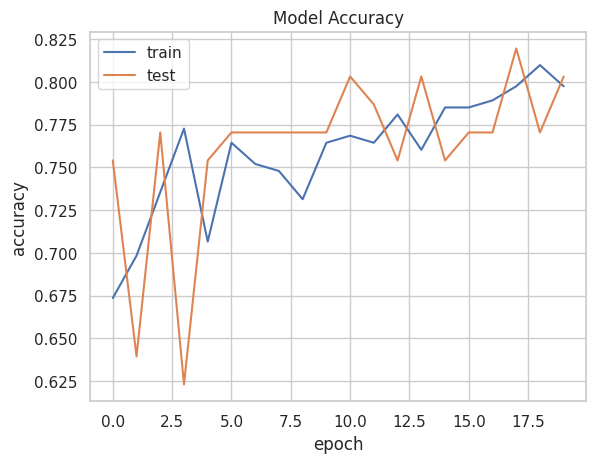

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
# Model accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'])
plt.show()

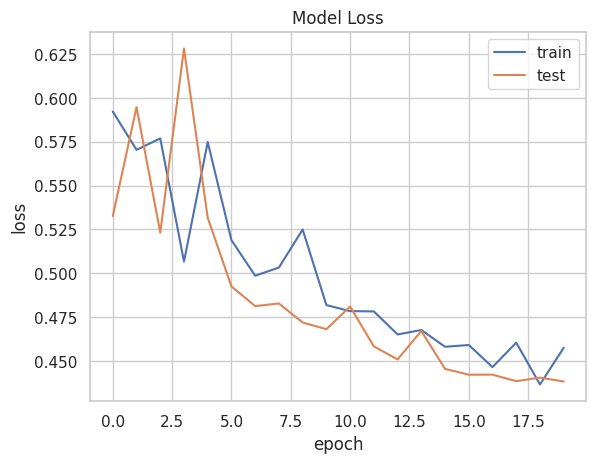

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'])
plt.show()

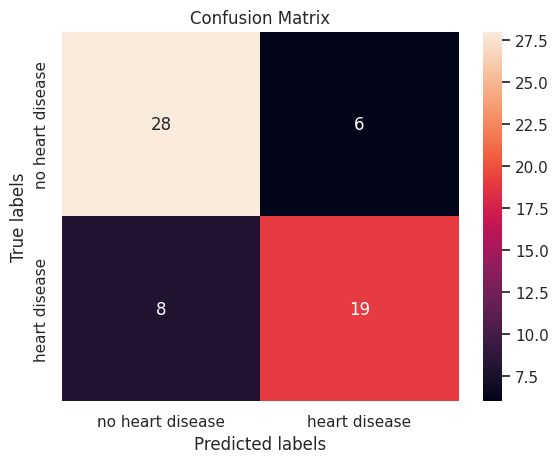

In [ ]:
yhat=ANN_CV.predict(X_test)
plot_confusion_matrix(Y_test_binary,yhat)

In [ ]:
from sklearn.model_selection import GridSearchCV
# Logistic Regression classification algorithm
from sklearn.linear_model import LogisticRegression
# Support Vector Machine classification algorithm
from sklearn.svm import SVC
# Decision Tree classification algorithm
from sklearn.tree import DecisionTreeClassifier
# K Nearest Neighbors classification algorithm
from sklearn.neighbors import KNeighborsClassifier

**Training with Logistics Regressor**

In [ ]:
#Create a logistic regression object then create a GridSearchCV object logreg_cv with cv = 10. Fit the object to find the best parameters from the dictionary parameters
parameters ={'C':[0.01,0.1,1],
             'penalty':['l2'],
             'solver':['lbfgs']}

In [ ]:
parameters ={"C":[0.01,0.1,1],'penalty':['l2'], 'solver':['lbfgs']}# l1 lasso l2 ridge
lr=LogisticRegression()
logreg_cv = GridSearchCV(lr, parameters, cv = 10)
logreg_cv.fit(X_train, Y_train_binary)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

GridSearchCV(cv=10, estimator=LogisticRegression(),
             param_grid={'C': [0.01, 0.1, 1], 'penalty': ['l2'],
                         'solver': ['lbfgs']})

In [ ]:
print("tuned hpyerparameters :(best parameters) ",logreg_cv.best_params_)
print("accuracy :",logreg_cv.best_score_)
log_score = logreg_cv.best_score_

NameError: name 'logreg_cv' is not defined

**Plotting the confusion matrix**

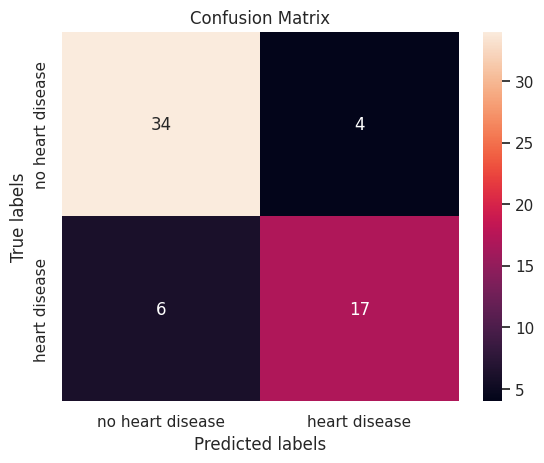

In [ ]:
yhat=logreg_cv.predict(X_test)
plot_confusion_matrix(Y_test_binary,yhat)

**Creating a support vector machine object then create a GridSearchCV object svm_cv with cv - 10. Fit the object to find the best parameters from the dictionary parameters.**